Shape of Data:  (150, 4)
Shape of transformed Data:  (150, 2)


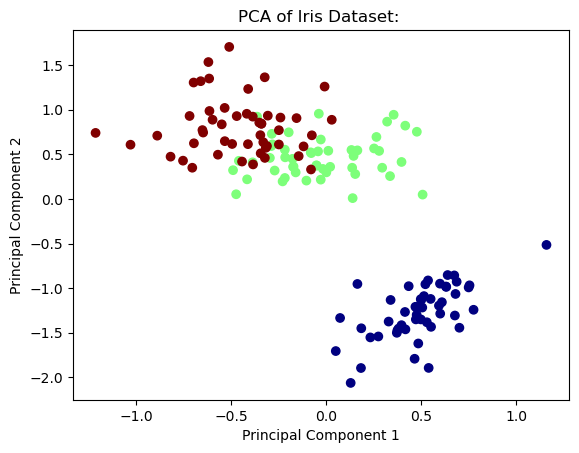

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:
    def __init__(self, n_components):  
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X-self.mean

        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        eigenvectots = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X-self.mean
        return np.dot(X, self.components.T)

X = load_iris().data
y = load_iris().target

pca = PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of Data: ", X.shape)
print("Shape of transformed Data: ", X_projected.shape)

pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap='jet')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset: ")
plt.show()